In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Train Data**

In [2]:
train_csv = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')
train_csv.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [3]:
train_csv.shape

(106800, 15)

In [4]:
train_csv.dtypes

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                     object
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object

**We have only one variable which is categorical, while all others are numerical.**

In [5]:
train_csv.isna().sum()

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

**We don't have any null values**

In [6]:
train_csv['expert_consensus'].unique()

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

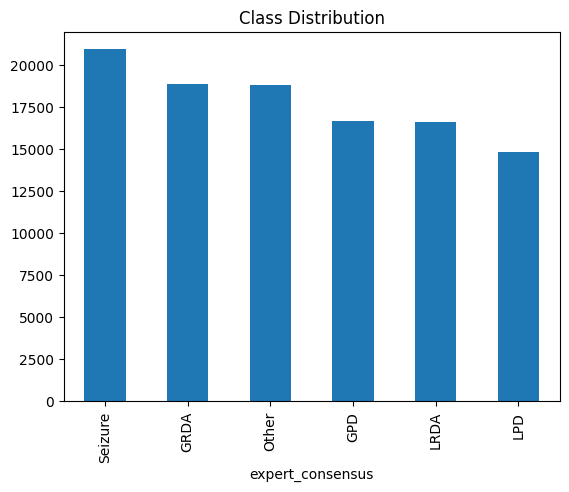

In [7]:
train_csv['expert_consensus'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [8]:
# percentage of class distribution
train_csv['expert_consensus'].value_counts()/len(train_csv['expert_consensus'])*100

expert_consensus
Seizure    19.600187
GRDA       17.660112
Other      17.610487
GPD        15.638577
LRDA       15.580524
LPD        13.910112
Name: count, dtype: float64

**The distribution of each class is almost equal. Hence, we have a balanced dataset**

In [9]:
# Number of unique patients
print(f"Number of unique patients in train dataset: {train_csv['patient_id'].nunique()}")

# Number of unique EEG IDs
print(f"Number of unique EEG IDs in train dataset: {train_csv['eeg_id'].nunique()}")

Number of unique patients in train dataset: 1950
Number of unique EEG IDs in train dataset: 17089


<Axes: >

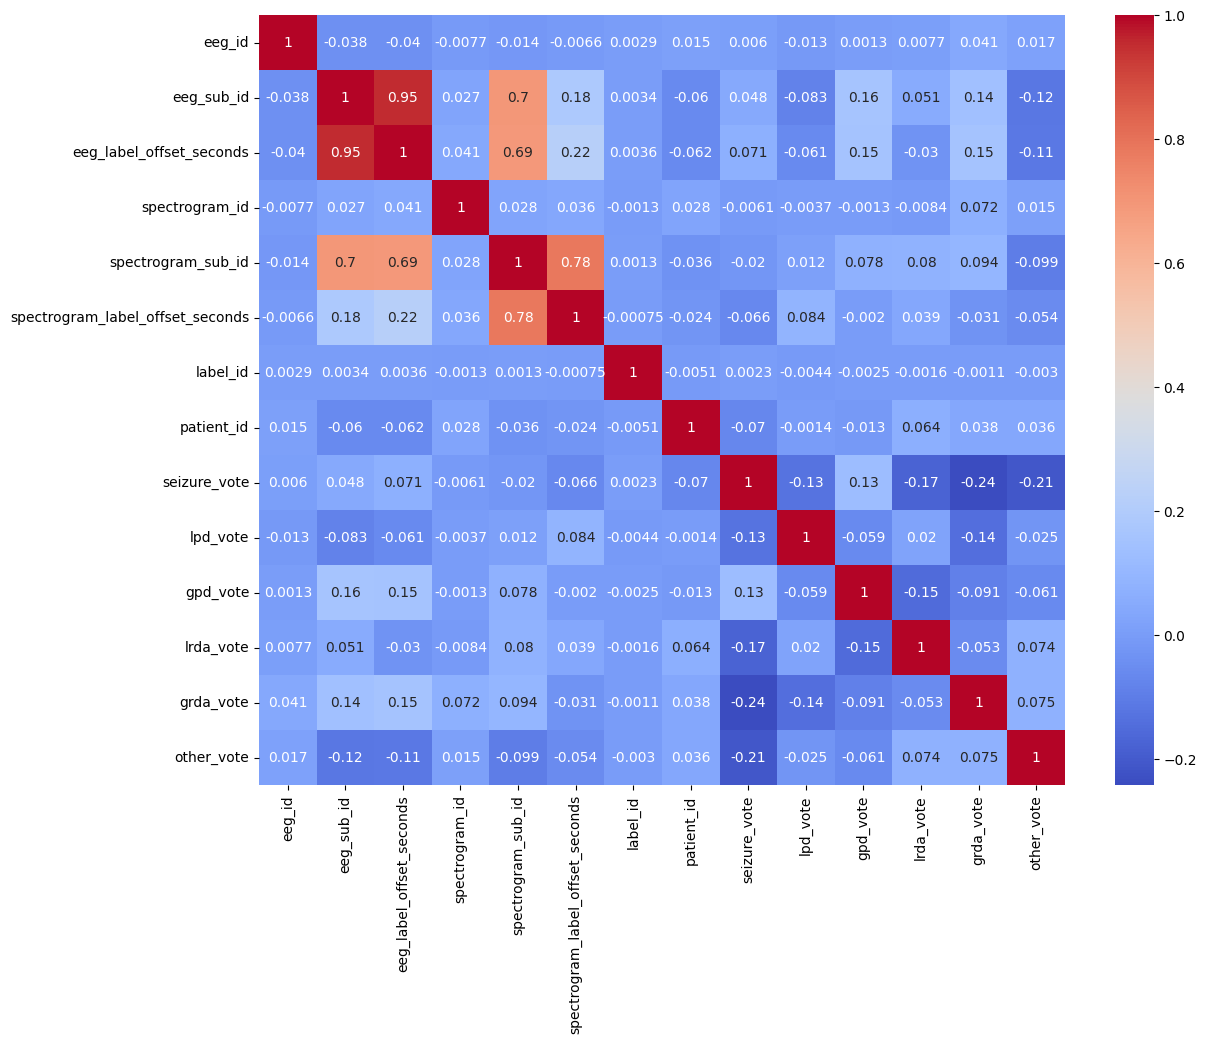

In [10]:
numerical_columns = train_csv.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(13,10))
sns.heatmap(train_csv[numerical_columns].corr(), annot = True, cmap='coolwarm')

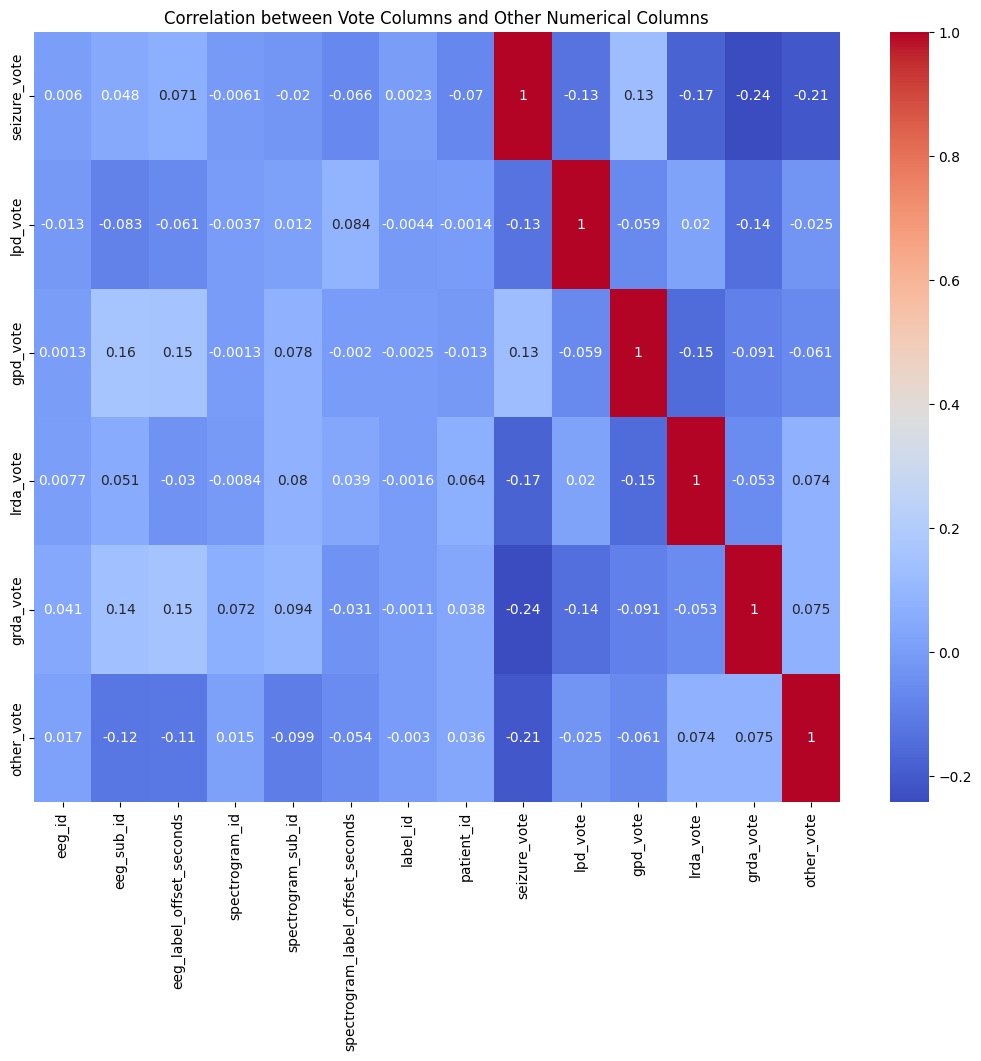

In [11]:
# Correlation with vote columns
plt.figure(figsize=(13, 10))
vote_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

# Select only numerical columns for correlation, including the specific vote columns
numerical_columns = train_csv.select_dtypes(include=['int64', 'float64']).columns
selected_columns = [col for col in numerical_columns if col in vote_columns or col not in vote_columns]
corr_matrix = train_csv[selected_columns].corr()

corr_matrix_votes = corr_matrix.loc[vote_columns, :]

sns.heatmap(corr_matrix_votes, annot=True, cmap='coolwarm')
plt.title('Correlation between Vote Columns and Other Numerical Columns')
plt.show()

* High positive correlations between eeg_sub_id, eeg_label_offset_seconds, spectrogram_sub_id, and spectrogram_label_offset_seconds imply these variables are related or derived from one another.
* The patient_id shows low correlation values with other variables, indicating that the patient identifiers have a negligible linear relationship with EEG or spectrogram characteristics.
* The votes for different EEG events (seizure_vote, lpd_vote, etc.) do not show significant correlations with eeg_id or spectrogram_id, which suggests that these votes are independent of the EEG or spectrogram identifiers and are more closely related to the actual EEG event occurrences.

In [12]:
train1 = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/1000086677.parquet', engine='pyarrow')
train1

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,28.680000,53.990002,67.629997,59.880001,50.880001,74.309998,78.480003,63.080002,59.869999,...,0.13,0.14,0.08,0.11,0.04,0.03,0.05,0.05,0.04,0.05
1,3,29.639999,38.959999,44.009998,66.800003,48.509998,42.180000,47.340000,48.599998,40.880001,...,0.15,0.13,0.08,0.08,0.07,0.06,0.07,0.06,0.06,0.06
2,5,8.890000,9.020000,16.360001,23.559999,27.340000,30.040001,27.559999,23.290001,15.120000,...,0.12,0.11,0.08,0.08,0.09,0.10,0.12,0.14,0.13,0.14
3,7,1.770000,1.930000,1.810000,1.600000,1.430000,1.280000,1.190000,1.110000,1.010000,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04
4,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,591,2.210000,2.280000,2.200000,1.280000,1.350000,1.930000,2.300000,2.440000,2.310000,...,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.03,0.03,0.03
296,593,2.490000,2.540000,2.150000,1.490000,1.360000,1.570000,1.970000,2.050000,1.890000,...,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.01,0.01,0.01
297,595,0.240000,0.190000,0.210000,0.120000,0.110000,0.080000,0.060000,0.040000,0.040000,...,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00
298,597,0.990000,1.230000,1.370000,1.620000,1.940000,2.190000,2.270000,2.310000,2.300000,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01


## **Electroencephalogram (EEG) Data**

In [13]:
eeg = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/train_eegs/1484166292.parquet')
eeg

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,11.700000,22.110001,-21.400000,-5.720000,5.39,-30.639999,-7.700000,-18.309999,-3.28,-5.550000,-8.83,9.230000,42.970001,37.840000,37.310001,-6.610000,-8.710000,-13.780000,44.189999,-39.160000
1,18.920000,30.280001,-2.540000,4.920000,12.43,-30.780001,-2.880000,-12.880000,8.36,6.740000,-0.10,19.100000,-203.610001,-216.270004,-210.070007,9.520000,9.940000,1.550000,52.070000,-29.520000
2,18.650000,26.660000,-13.320000,-1.690000,9.12,-28.520000,-8.630000,-17.200001,6.20,3.840000,-3.73,17.360001,-25.500000,-22.379999,-11.790000,11.410000,13.660000,2.390000,50.750000,-30.600000
3,19.540001,27.920000,-13.930000,-5.510000,8.33,-28.809999,-11.760000,-20.700001,5.67,1.670000,-5.99,20.610001,92.019997,90.339996,96.190002,11.720000,10.980000,-1.850000,49.220001,-37.459999
4,19.730000,29.480000,-13.470000,-3.580000,16.68,-22.510000,-7.540000,-16.350000,10.47,6.150000,-3.83,28.820000,-118.419998,-133.289993,-126.440002,21.610001,18.629999,3.790000,51.790001,-37.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,-19.500000,8.050000,-38.369999,-40.980000,-7.35,-28.809999,-42.660000,-60.180000,-9.10,-21.070000,-41.73,0.260000,-51.439999,-75.680000,0.640000,-1.850000,-40.000000,-40.340000,-10.360000,-1.880000
12796,-22.709999,7.350000,-35.220001,-39.990002,-8.70,-30.450001,-43.880001,-59.060001,-13.34,-24.820000,-41.98,-6.550000,43.119999,13.980000,84.760002,-8.850000,-45.320000,-42.450001,-10.610000,-6.840000
12797,-9.300000,13.400000,-31.650000,-34.380001,-0.85,-21.969999,-41.610001,-54.400002,-7.69,-18.750000,-36.32,-1.260000,-84.389999,-121.959999,-48.849998,-9.710000,-40.709999,-35.259998,-5.070000,-2.840000
12798,-11.000000,14.040000,-21.740000,-25.400000,0.01,-23.230000,-33.639999,-44.529999,-3.21,-11.960000,-28.82,0.890000,-123.830002,-151.410004,-69.430000,-6.800000,-32.680000,-27.040001,5.810000,1.770000


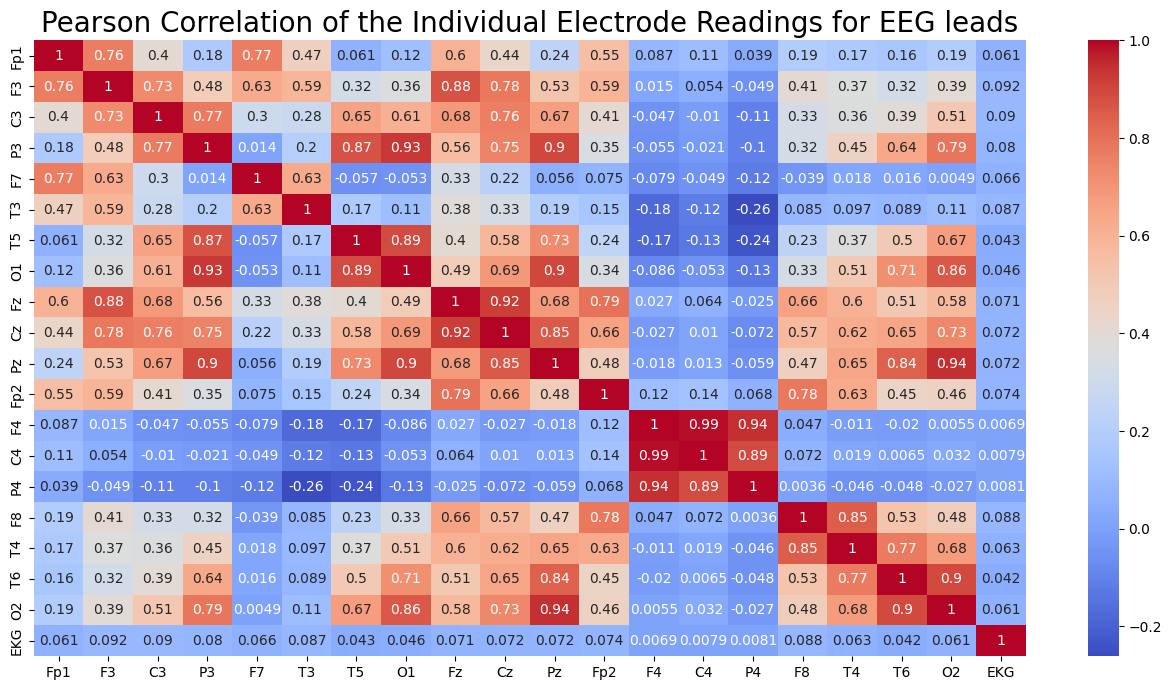

In [14]:
# Correlation Analysis
corr_matrix = eeg.corr()

# Increase the size of the figure
plt.figure(figsize=(16, 8)) 

# Heatmap for correlation analysis
# We are using 'coolwarm' colormap here to distinguish positive and negative correlations easily
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Pearson Correlation of the Individual Electrode Readings for EEG leads', fontsize=20)
plt.show()

In [15]:
from scipy.stats import skew, kurtosis

def calculate_time_domain_features(eeg_data):
    """
    Calculate time domain features for each channel in the EEG data.

    Parameters:
    eeg_data (pandas.DataFrame): A DataFrame with each column representing an EEG channel.

    Returns:
    pandas.DataFrame: A DataFrame with time domain features for each channel.
    """
    features_dict = {}

    # Calculate features for each channel
    for column in eeg_data.columns:
        features_dict[f'{column}_mean'] = [eeg_data[column].mean()]
        features_dict[f'{column}_std'] = [eeg_data[column].std()]
        features_dict[f'{column}_max'] = [eeg_data[column].max()]
        features_dict[f'{column}_min'] = [eeg_data[column].min()]
        features_dict[f'{column}_skewness'] = [skew(eeg_data[column])]
        features_dict[f'{column}_kurtosis'] = [kurtosis(eeg_data[column])]

    # Create a DataFrame from the dictionary
    features_df = pd.DataFrame(features_dict)

    return features_df

time_domain_features = calculate_time_domain_features(eeg)
time_domain_features

,Fp1_mean,Fp1_std,Fp1_max,Fp1_min,Fp1_skewness,Fp1_kurtosis,F3_mean,F3_std,F3_max,F3_min,...,O2_max,O2_min,O2_skewness,O2_kurtosis,EKG_mean,EKG_std,EKG_max,EKG_min,EKG_skewness,EKG_kurtosis
0,-16.231226,18.079952,35.68,-82.559998,-0.060438,-0.356501,9.518816,13.200528,50.889999,-50.310001,...,89.720001,-71.669998,-0.10779,0.121281,18.218866,78.107521,445.959991,-90.68,3.592812,13.6502


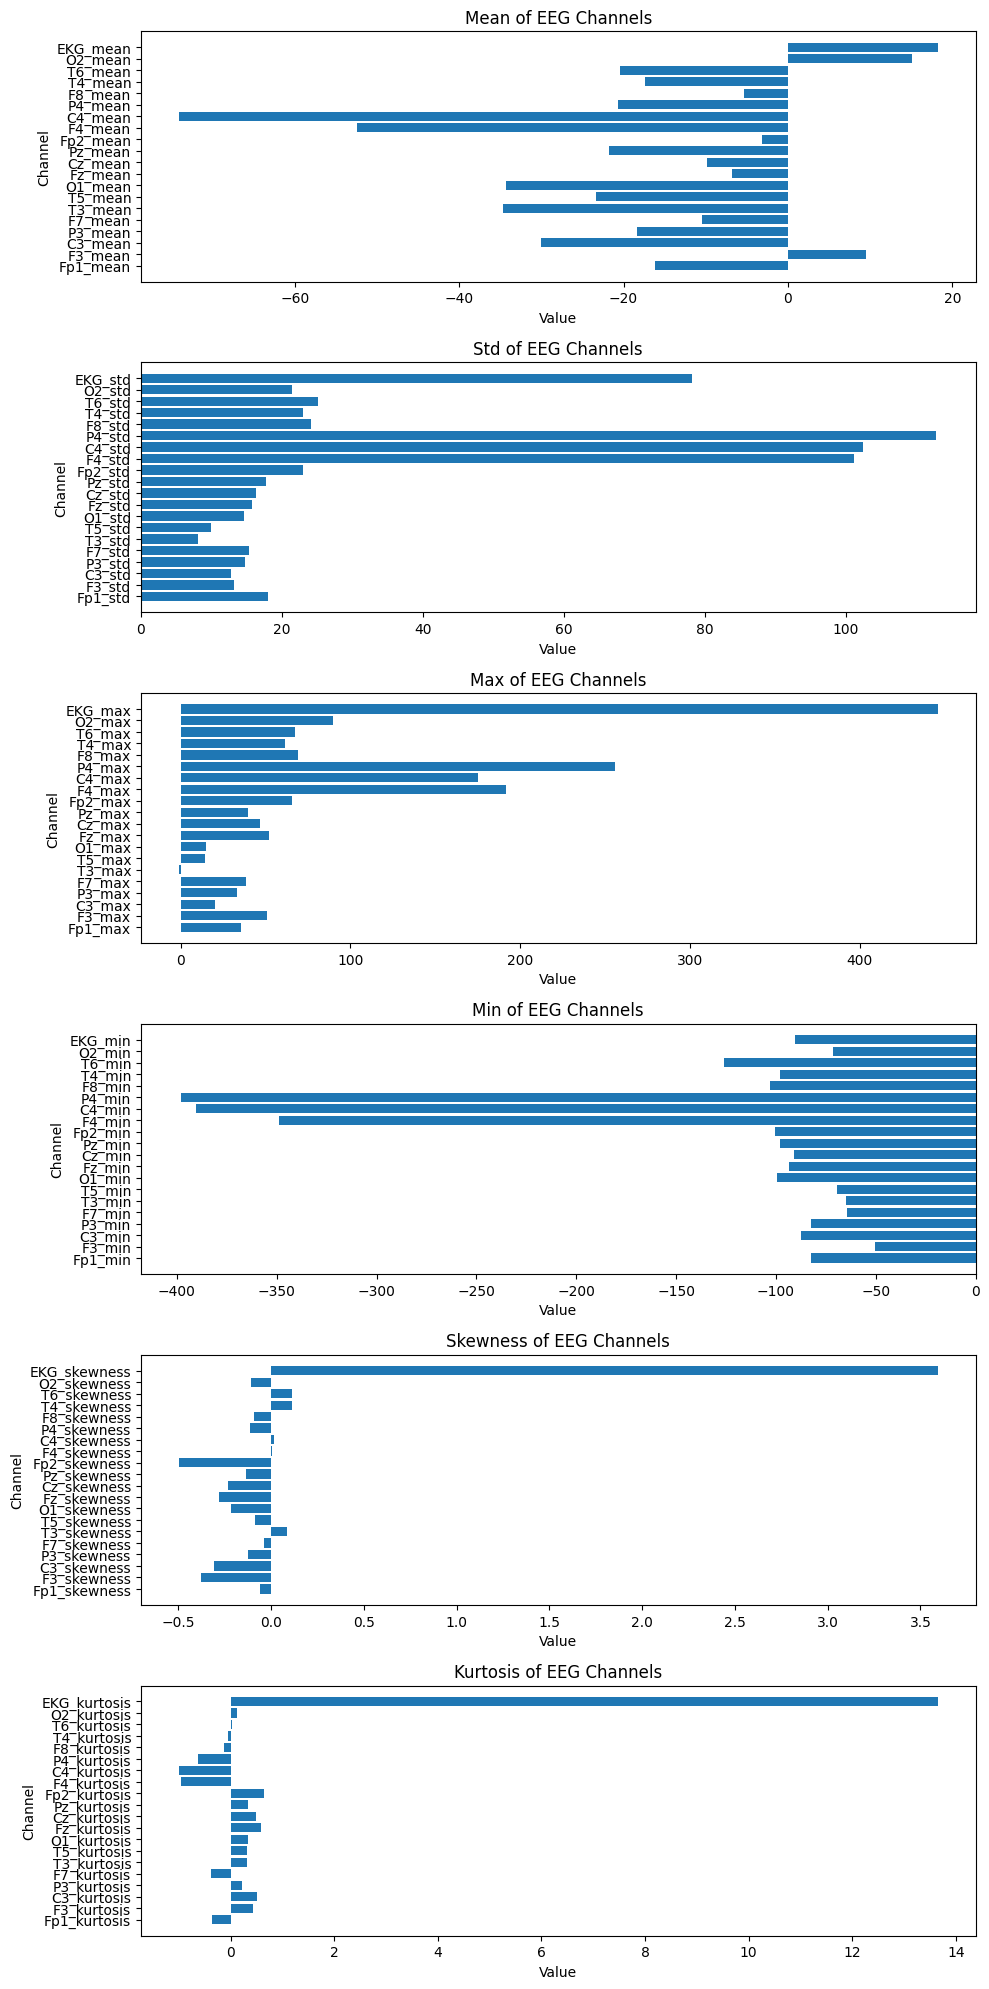

In [16]:
def visualize_features_subplots(features_df):
    flat_data = features_df.T.reset_index()
    flat_data.columns = ['Feature', 'Value']

    feature_types = ['mean', 'std', 'max', 'min', 'skewness', 'kurtosis']
    fig, axes = plt.subplots(nrows=len(feature_types), ncols=1, figsize=(10, 20))

    for i, feature_type in enumerate(feature_types):
        ax = axes[i]
        filtered_data = flat_data[flat_data['Feature'].str.contains(feature_type)]
        ax.barh(filtered_data['Feature'], filtered_data['Value'])
        ax.set_title(f'{feature_type.capitalize()} of EEG Channels')
        ax.set_xlabel('Value')
        ax.set_ylabel('Channel')

    plt.tight_layout()
    plt.show()

visualize_features_subplots(time_domain_features)

In [17]:
import scipy.signal

def find_peaks(data, height=None, distance=None):
    """Identify peaks in the EEG signal."""
    peaks, _ = scipy.signal.find_peaks(data, height=height, distance=distance)
    return peaks

def hjorth_parameters(data):
    """Calculate Hjorth parameters: Activity, Mobility, and Complexity."""
    activity = np.var(data)
    mobility = np.sqrt(np.var(np.diff(data)) / activity)
    complexity = np.sqrt(np.var(np.diff(np.diff(data))) / np.var(np.diff(data))) / mobility
    return activity, mobility, complexity

def calculate_features(eeg_df):
    """
    Calculate peaks and Hjorth parameters for each EEG channel.

    Parameters:
    eeg_df (pandas.DataFrame): DataFrame with each column representing an EEG channel.

    Returns:
    pandas.DataFrame: A single-row DataFrame containing peaks and Hjorth parameters for each channel.
    """
    features = {}

    for column in eeg_df.columns:
        data = eeg_df[column]
        
        # Peak analysis
        peaks = find_peaks(data)
        features[f'{column}_peak_count'] = len(peaks)

        # Hjorth parameters
        activity, mobility, complexity = hjorth_parameters(data)
        features[f'{column}_activity'] = activity
        features[f'{column}_mobility'] = mobility
        features[f'{column}_complexity'] = complexity

    return pd.DataFrame([features])

eeg_features = calculate_features(eeg)
eeg_features

,Fp1_peak_count,Fp1_activity,Fp1_mobility,Fp1_complexity,F3_peak_count,F3_activity,F3_mobility,F3_complexity,C3_peak_count,C3_activity,...,T6_mobility,T6_complexity,O2_peak_count,O2_activity,O2_mobility,O2_complexity,EKG_peak_count,EKG_activity,EKG_mobility,EKG_complexity
0,2989,326.859131,0.269288,5.090763,2995,174.240326,0.367991,3.720708,3663,164.954178,...,0.27045,4.56554,2690,461.499176,0.26639,4.684856,3025,6100.308105,0.274624,2.397957


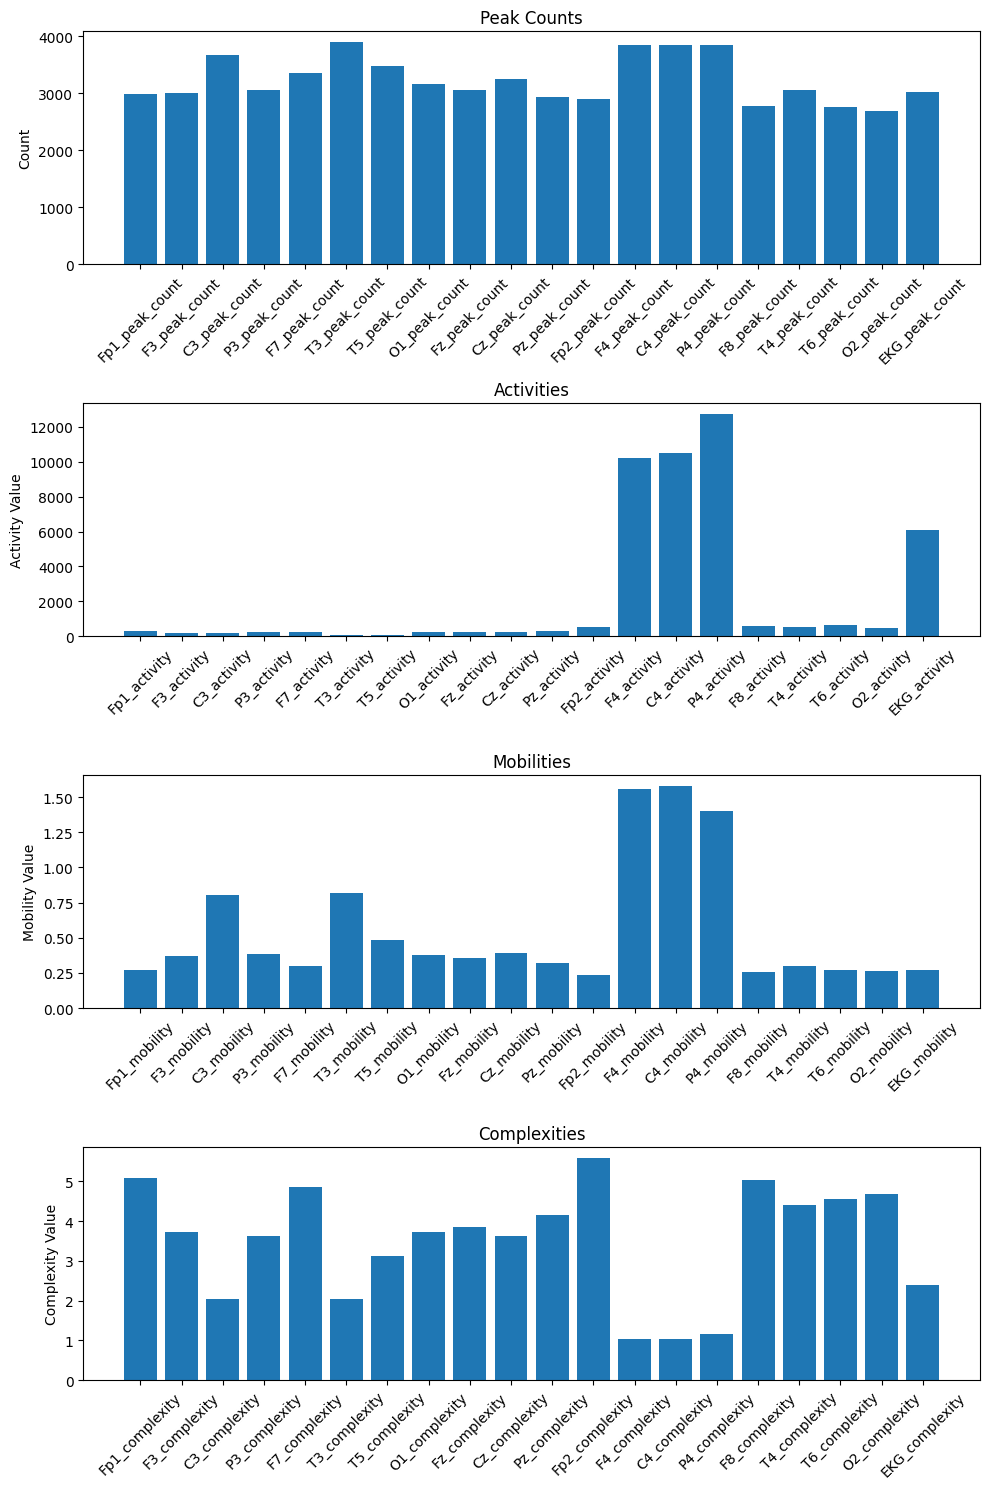

In [18]:
# Plotting
fig, axs = plt.subplots(4, figsize=(10, 15))

# Peak Counts
axs[0].bar(eeg_features.columns[eeg_features.columns.str.contains('peak_count')], eeg_features.iloc[0, eeg_features.columns.str.contains('peak_count')])
axs[0].set_title('Peak Counts')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Activities
axs[1].bar(eeg_features.columns[eeg_features.columns.str.contains('activity')], eeg_features.iloc[0, eeg_features.columns.str.contains('activity')])
axs[1].set_title('Activities')
axs[1].set_ylabel('Activity Value')
axs[1].tick_params(axis='x', rotation=45)

# Mobilities
axs[2].bar(eeg_features.columns[eeg_features.columns.str.contains('mobility')], eeg_features.iloc[0, eeg_features.columns.str.contains('mobility')])
axs[2].set_title('Mobilities')
axs[2].set_ylabel('Mobility Value')
axs[2].tick_params(axis='x', rotation=45)

# Complexities
axs[3].bar(eeg_features.columns[eeg_features.columns.str.contains('complexity')], eeg_features.iloc[0, eeg_features.columns.str.contains('complexity')])
axs[3].set_title('Complexities')
axs[3].set_ylabel('Complexity Value')
axs[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Spectrogram Data**

In [19]:
spectrogram = pd.read_parquet('/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/862174834.parquet')
spectrogram

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,109.330002,130.699997,105.570000,92.580002,74.320000,30.340000,36.740002,26.240000,19.000000,...,0.13,0.10,0.07,0.09,0.06,0.04,0.04,0.03,0.04,0.04
1,3,86.809998,84.309998,84.430000,51.900002,29.790001,29.629999,36.400002,23.920000,25.879999,...,0.09,0.07,0.09,0.05,0.05,0.04,0.04,0.04,0.05,0.05
2,5,301.160004,294.029999,303.250000,141.369995,39.599998,32.410000,28.360001,13.320000,15.800000,...,0.04,0.04,0.04,0.03,0.05,0.05,0.04,0.05,0.04,0.03
3,7,300.359985,323.549988,281.339996,169.529999,62.540001,53.139999,33.770000,21.709999,14.040000,...,0.04,0.04,0.02,0.03,0.04,0.05,0.05,0.04,0.04,0.03
4,9,266.519989,262.540009,256.809998,212.690002,70.180000,40.799999,37.220001,47.590000,44.049999,...,0.05,0.05,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,623,262.160004,298.959991,289.019989,270.369995,248.949997,152.419998,125.410004,172.869995,73.809998,...,0.12,0.08,0.12,0.12,0.08,0.12,0.16,0.15,0.16,0.16
312,625,64.070000,232.619995,269.179993,235.429993,262.579987,235.860001,214.009995,147.110001,193.589996,...,0.15,0.14,0.14,0.12,0.11,0.11,0.13,0.12,0.20,0.19
313,627,310.989990,309.910004,277.589996,266.799988,192.179993,247.240005,280.890015,336.070007,408.809998,...,0.17,0.22,0.20,0.15,0.10,0.14,0.06,0.09,0.12,0.10
314,629,230.630005,243.639999,226.029999,189.130005,108.080002,176.169998,218.729996,271.019989,282.019989,...,0.24,0.23,0.18,0.16,0.08,0.07,0.09,0.11,0.09,0.11


In [20]:
def plot_spectrogram(spectrogram_path, colormap='viridis', aspect='auto', label_interval=None):
    try:
        sample_spect = pd.read_parquet(spectrogram_path)
    except Exception as e:
        print(f"Error loading file: {e}")
        return

    split_spect = {
        "LL": sample_spect.filter(regex='^LL', axis=1),
        "RL": sample_spect.filter(regex='^RL', axis=1),
        "RP": sample_spect.filter(regex='^RP', axis=1),
        "LP": sample_spect.filter(regex='^LP', axis=1),
    }
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    axes = axes.flatten()

    for i, split_name in enumerate(split_spect.keys()):
        ax = axes[i]
        spect_data = np.log(split_spect[split_name] + 1e-9).T  # Adding a small constant to avoid log(0)
        img = ax.imshow(spect_data, cmap=colormap, aspect=aspect, origin='lower')
        
        cbar = fig.colorbar(img, ax=ax)
        cbar.set_label('Log(Value)', rotation=270, labelpad=15)
        ax.set_title(split_name)
        ax.set_ylabel("Frequency (Hz)")
        ax.set_xlabel("Time")

        frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
        if label_interval is None:
            label_interval = max(1, len(frequencies) // 15)  # Dynamic label interval
        ax.set_yticks(np.arange(0, len(frequencies), label_interval))
        ax.set_yticklabels(frequencies[::label_interval])

    plt.tight_layout()
    plt.show()

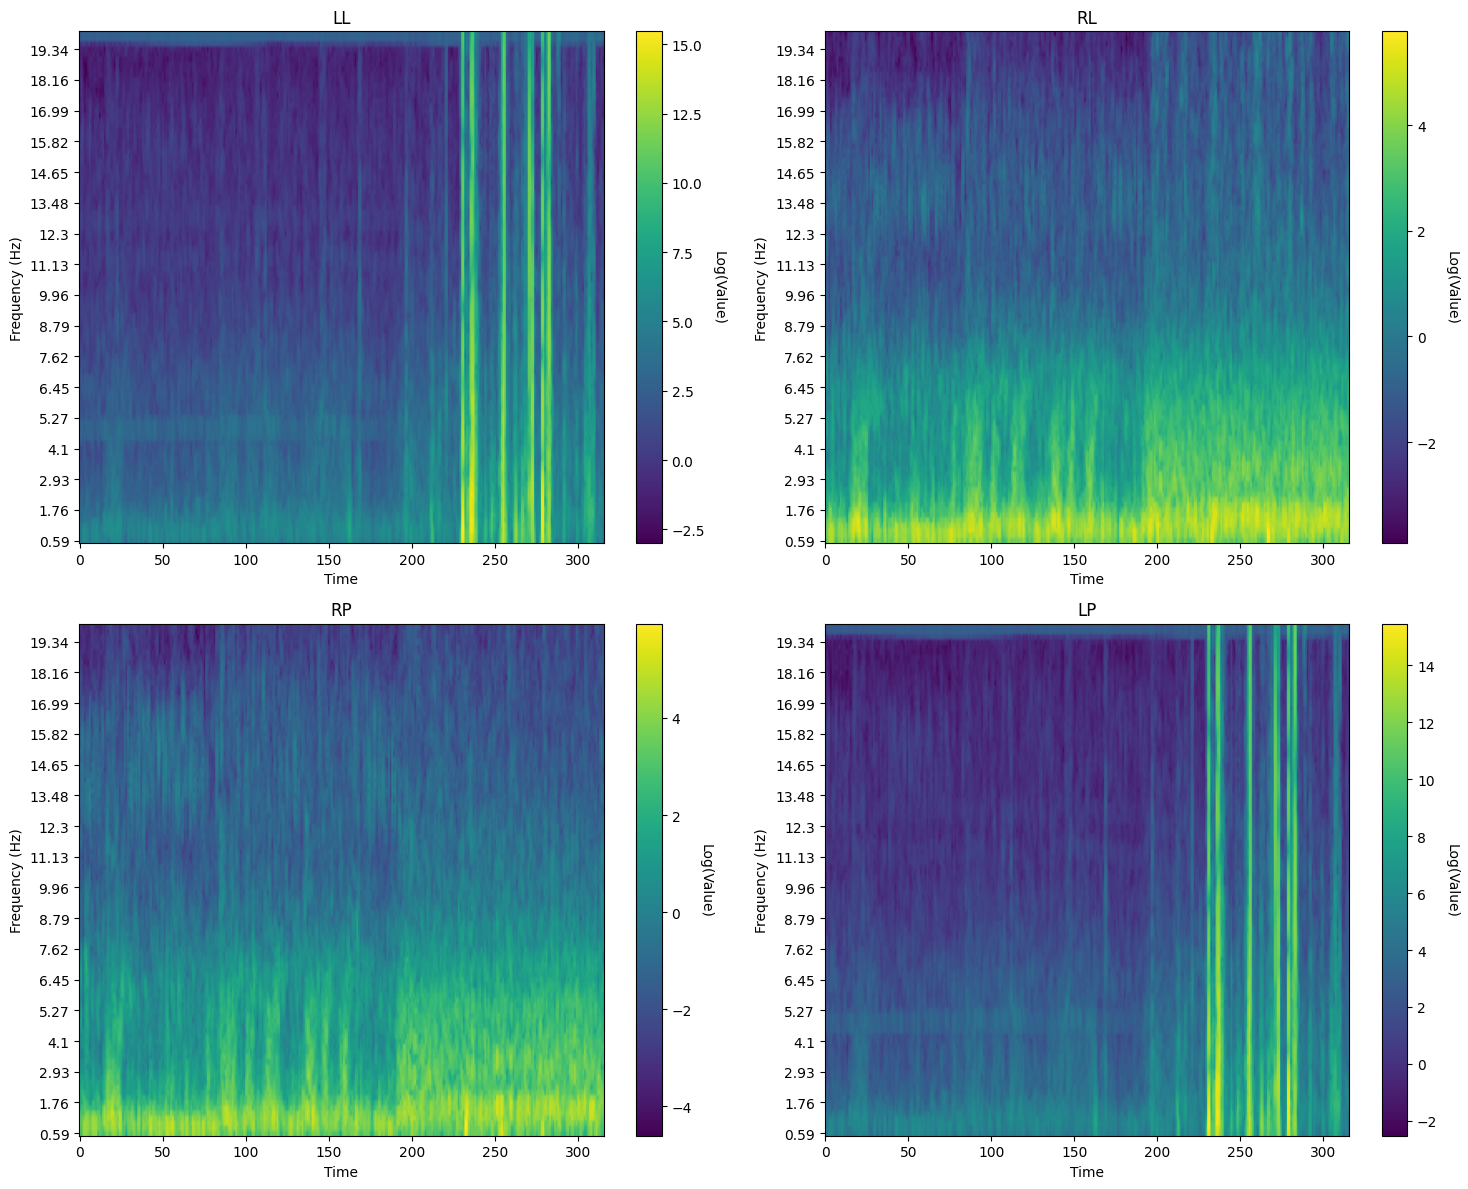

In [21]:
plot_spectrogram("/kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms/862174834.parquet")